# Summary

### Chapter 1: Exploratory Data Analysis
- 1.1: Importing Data and First Look
- 1.2: Checking Null Values
- 1.3: Checking Data Types 
- 1.4: Visual Analysis

### Chapter 2: Data Wrangling
- 2.1: Converting Types
- 2.2: Handling White Spaces
- 2.3: One-Hot Encoding
- 2.4: Min Max Scaler
- 2.5: Correlations
- 2.6: Train Test Split

### Chapter 3: Building Machine Learning Models
- 3.1: Logistic Regression
- 3.2: Random Forest
- 3.3: Gradient Boosting
- 3.4: SVC (Support Vector Classifier)
- 3.5: Shallow Neural Network

### Chapter 4: Testing Models and Conclusion
- 4.1: Testing Model
- 4.2: Conclusion

# Chapter 1: Exploratory Data Analysis

In this section, we take a close look at our data to understand what it can tell us. 

This step is crucial for getting to know our data better before we dive into more advanced techniques.

### 1.1: Importing Data and First Look

Let's start by importing our data from a '.csv' file using the Pandas library, so we can view our data and perform an initial analysis on it.

In [478]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [479]:
# Reading the CSV file "WA_Fn-UseC_-Telco-Customer-Churn.csv" into a DataFrame and storing it in churn_df
churn_df_raw = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
# Displaying the contents of the DataFrame churn_df
churn_df_raw

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


The column customerID contains the ID of each customer, and as this information is clearly not relevant for predicting churn, we will exclude this column.

In [480]:
# Dropping the 'customerID' column from the DataFrame churn_df along the columns axis (axis=1) and modifying the DataFrame in place
churn_df_raw.drop('customerID',axis='columns',inplace=True)

In [481]:
# Displaying information about the DataFrame churn_df, including the data types and memory usage
churn_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [482]:
# Generating descriptive statistics for the DataFrame churn_df, including measures like count, mean, standard deviation, minimum, and maximum values, among others
churn_df_raw.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### 1.2: Checking Null Values

In [483]:
# Checking for missing values in the DataFrame churn_df and summing up the missing values for each column
churn_df_raw.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [484]:
# Finding values that contain only white spaces in the 'TotalCharges' column
empty_values = churn_df_raw[churn_df_raw['TotalCharges'].str.strip() == '']

# Displaying the number of values that contain only white spaces
print("Number of values that contain only white spaces in the 'TotalCharges' column:", len(empty_values))

Number of values that contain only white spaces in the 'TotalCharges' column: 11


### 1.3: Checking Data Types

In this stage, we will check some columns of our dataframe to see if the data is classified with their correct types.

In [485]:
columns_to_check = ['Partner', 'Dependents', 'PhoneService','PaperlessBilling', 'Churn']

# Iterating over the columns to check
for column in columns_to_check:
    # Retrieving the unique values for each column
    unique_values = churn_df_raw[column].unique()
    # Printing the unique values along with the column name
    print(f"Unique values for the column '{column}': {unique_values}")


Unique values for the column 'Partner': ['Yes' 'No']
Unique values for the column 'Dependents': ['No' 'Yes']
Unique values for the column 'PhoneService': ['No' 'Yes']
Unique values for the column 'PaperlessBilling': ['Yes' 'No']
Unique values for the column 'Churn': ['No' 'Yes']


In [486]:
columns_to_check = ['gender', 'SeniorCitizen']

# Loop through columns to check unique values
for column in columns_to_check:
    # Get unique values for the column
    unique_values = churn_df_raw[column].unique()
    # Print unique values for the column
    print(f"Unique values for the column '{column}': {unique_values}")

Unique values for the column 'gender': ['Female' 'Male']
Unique values for the column 'SeniorCitizen': [0 1]


It seems that the columns 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn', 'gender', and 'SeniorCitizen' contain binary information and may work better if they are represented as booleans in the future.

In [487]:
columns_to_check = ['MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 
                    'StreamingMovies', 'Contract', 'PaymentMethod']

# Loop through columns to check unique values
for column in columns_to_check:
    # Get unique values for the column
    unique_values = churn_df_raw[column].unique()
    # Print unique values for the column
    print(f"Unique values for the column '{column}': {unique_values}")

Unique values for the column 'MultipleLines': ['No phone service' 'No' 'Yes']
Unique values for the column 'InternetService': ['DSL' 'Fiber optic' 'No']
Unique values for the column 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Unique values for the column 'OnlineBackup': ['Yes' 'No' 'No internet service']
Unique values for the column 'DeviceProtection': ['No' 'Yes' 'No internet service']
Unique values for the column 'TechSupport': ['No' 'Yes' 'No internet service']
Unique values for the column 'StreamingTV': ['No' 'Yes' 'No internet service']
Unique values for the column 'StreamingMovies': ['No' 'Yes' 'No internet service']
Unique values for the column 'Contract': ['Month-to-month' 'One year' 'Two year']
Unique values for the column 'PaymentMethod': ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


On the other hand, the columns 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', and 'PaymentMethod' have more than two types of input values, thus requiring a one-hot encoding process for them in the next stage of this project.

### 1.4: Visual Analysis

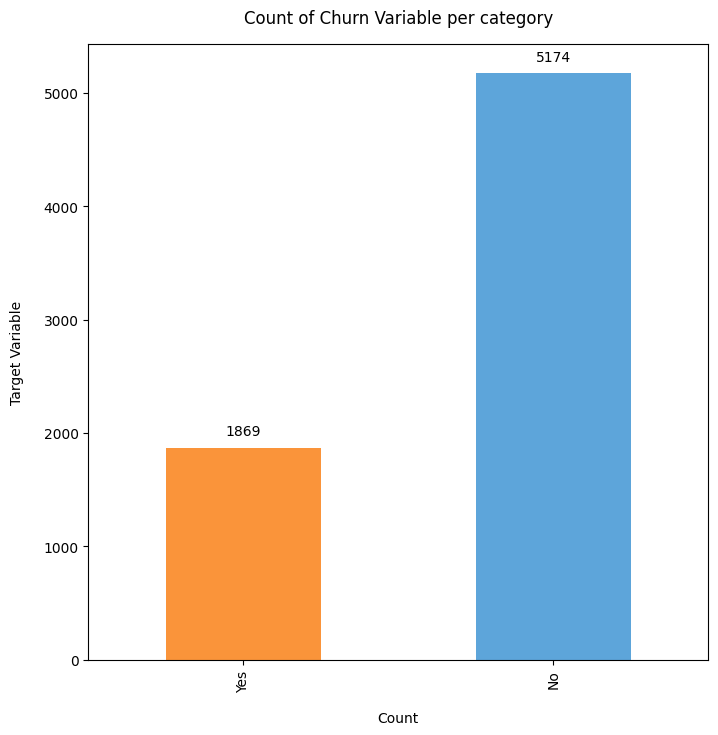

In [488]:
# Reorders the values on the y-axis
ordered_counts = churn_df_raw['Churn'].value_counts()[['Yes', 'No']]

# Colors for each bar
colors = ['#FA943A', '#5DA5DA'] 

# Creates the bar plot
ax = ordered_counts.plot(kind='bar', figsize=(8, 8), color=colors)

# Adds numbers on top of the bars with a larger margin
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + ax.get_ylim()[1]*0.02, str(i.get_height()), ha='center', fontsize=10)

# Plot configurations
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of Churn Variable per category", y=1.02)

# # Save the plot as an image file (e.g., PNG)
# plt.savefig('count_plot.png', bbox_inches='tight')

# Displays the plot
plt.show()


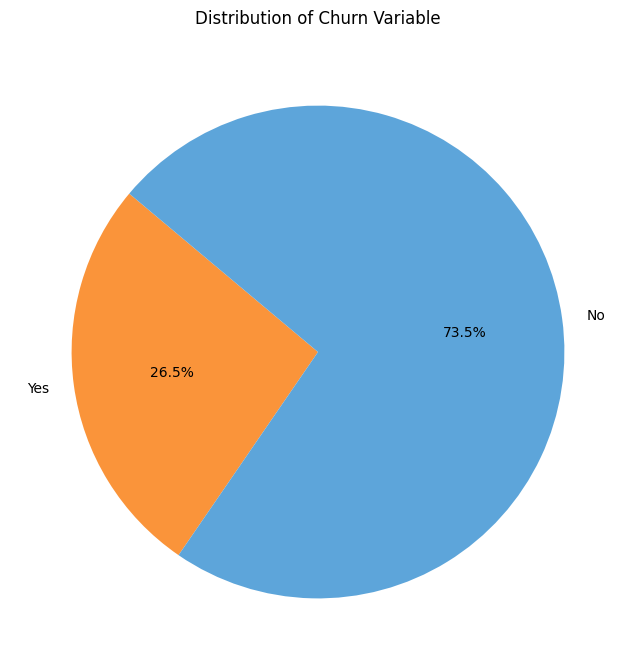

In [489]:
# Reorders the values on the y-axis
ordered_counts = churn_df_raw['Churn'].value_counts()[['Yes', 'No']]

# Creates the pie chart
plt.figure(figsize=(8, 8))
plt.pie(ordered_counts, labels=ordered_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)

# Adds numbers inside each slice
plt.gca().set_aspect('equal')
plt.title("Distribution of Churn Variable", y=1.02)

# # Save the plot as an image file (e.g., PNG)
# plt.savefig('pie_chart.png', bbox_inches='tight')

# Displays the plot
plt.show()

Our dataset target evidently exhibits class imbalance. In the 'Churn' column, 73.5% represents 'No' and 26.5% represents 'Yes'.

We should split our training, validation, and test sets with consideration for this class imbalance. Techniques such as Undersampling and SMOTE can also prove effective in such cases, particularly when employing algorithms that struggle with imbalanced data. 

It's essential to remain mindful of this imbalance during model validation and testing as well. Our aim is to ensure the model performs well on imbalanced datasets that mirror real-world scenarios.

# Chapter 2: Data Wrangling

In [490]:
# Creating a copy of churn_df_raw and naming it churn_df
churn_df = churn_df_raw.copy()

### 2.1: Converting Types

In [491]:
# List of boolean columns
boolean_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# Conversion mapping
conversion_map = {'No': False, 'Yes': True}

def convert_boolean_columns(df, boolean_columns, conversion_map):
    for column in boolean_columns:
        df[column] = df[column].map(conversion_map)
    return df

# Exemplo de uso da função
churn_df = convert_boolean_columns(churn_df, boolean_columns, conversion_map)

# Exibindo os primeiros registros do DataFrame para verificação
churn_df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,True,False,1,False,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,True,Electronic check,29.85,29.85,False
1,Male,0,False,False,34,True,No,DSL,Yes,No,Yes,No,No,No,One year,False,Mailed check,56.95,1889.5,False
2,Male,0,False,False,2,True,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,True,Mailed check,53.85,108.15,True
3,Male,0,False,False,45,False,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,False,Bank transfer (automatic),42.30,1840.75,False
4,Female,0,False,False,2,True,No,Fiber optic,No,No,No,No,No,No,Month-to-month,True,Electronic check,70.70,151.65,True


In [492]:
def convert_columns(df):
    # Conversion mapping for the 'gender' column
    gender_conversion_map = {'Male': False, 'Female': True}
    
    # Converting the 'gender' column
    df['gender'] = df['gender'].map(gender_conversion_map)

    # Converting the 'SeniorCitizen' column to bool
    df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool)
    
    return df

# Example usage:
# Assuming churn_df is the name of your DataFrame
churn_df = convert_columns(churn_df)

# Displaying the first few records of the DataFrame for verification
print(churn_df.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0    True          False     True       False       1         False   
1   False          False    False       False      34          True   
2   False          False    False       False       2          True   
3   False          False    False       False      45         False   
4    True          False    False       False       2          True   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1             

In [493]:
# Displaying the data types of each column in the DataFrame churn_df
churn_df.dtypes

gender                 bool
SeniorCitizen          bool
Partner                bool
Dependents             bool
tenure                int64
PhoneService           bool
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling       bool
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                  bool
dtype: object

### 2.2: Handling White Spaces

In [494]:
import numpy as np

def clean_total_charges_column(df):
    # Replace values containing only whitespace with NaN in the 'TotalCharges' column
    df['TotalCharges'] = df['TotalCharges'].replace(r'^\s*$', np.nan, regex=True)
    
    # Drop rows containing NaN in the 'TotalCharges' column
    df.dropna(subset=['TotalCharges'], inplace=True)
    
    # Convert the 'TotalCharges' column to float
    df['TotalCharges'] = df['TotalCharges'].astype(float)

clean_total_charges_column(churn_df)

In [495]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   bool   
 1   SeniorCitizen     7032 non-null   bool   
 2   Partner           7032 non-null   bool   
 3   Dependents        7032 non-null   bool   
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   bool   
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   bool   
 16  PaymentMethod     7032 non-null   object 
 17  

### 2.3: One-Hot Encoding

In [496]:
# List of columns to apply one-hot encoding
columns_to_encode = ['MultipleLines', 'InternetService', 'OnlineSecurity', 
                     'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                     'StreamingTV', 'StreamingMovies', 'Contract', 
                     'PaymentMethod']

# Applying one-hot encoding
churn_df = pd.get_dummies(churn_df, columns=columns_to_encode)

# Displaying the first few records of the DataFrame with the encoded columns
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,True,False,True,False,1,False,True,29.85,29.85,False,...,True,False,False,True,False,False,False,False,True,False
1,False,False,False,False,34,True,False,56.95,1889.50,False,...,True,False,False,False,True,False,False,False,False,True
2,False,False,False,False,2,True,True,53.85,108.15,True,...,True,False,False,True,False,False,False,False,False,True
3,False,False,False,False,45,False,False,42.30,1840.75,False,...,True,False,False,False,True,False,True,False,False,False
4,True,False,False,False,2,True,True,70.70,151.65,True,...,True,False,False,True,False,False,False,False,True,False


In [497]:
# Displaying the data types of each column in the DataFrame churn_df_encoded
churn_df.dtypes

gender                                        bool
SeniorCitizen                                 bool
Partner                                       bool
Dependents                                    bool
tenure                                       int64
PhoneService                                  bool
PaperlessBilling                              bool
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                         bool
MultipleLines_No                              bool
MultipleLines_No phone service                bool
MultipleLines_Yes                             bool
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No                            bool
OnlineSecurity_No                             bool
OnlineSecurity_No internet service            bool
OnlineSecurity_Yes                            bool
OnlineBackup_No                

### 2.4: Min Max Scaler

In [498]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to the data, except for the target column (if any)
columns_to_normalize = [col for col in churn_df.columns if col != 'Churn']
churn_df[columns_to_normalize] = scaler.fit_transform(churn_df[columns_to_normalize])

# Visualize the normalized dataframe
churn_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,1.0,0.0,0.000000,0.0,1.0,0.115423,0.001275,False,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.464789,1.0,0.0,0.385075,0.215867,False,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.014085,1.0,1.0,0.354229,0.010310,True,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.619718,0.0,0.0,0.239303,0.210241,False,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.014085,1.0,1.0,0.521891,0.015330,True,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,1.0,1.0,0.323944,1.0,1.0,0.662189,0.227521,False,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,1.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.845274,0.847461,False,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,1.0,0.0,1.0,1.0,0.140845,0.0,1.0,0.112935,0.037809,False,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,0.0,1.0,1.0,0.0,0.042254,1.0,1.0,0.558706,0.033210,True,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### 2.5: Correlation

In [499]:
# Calculating the correlation matrix
correlation_matrix = churn_df.corr()

# Extracting correlations with the 'Churn' column
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)

# Displaying the correlations
churn_correlation

Churn                                      1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192858
PaperlessBilling                           0.191454
SeniorCitizen                              0.150541
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
PhoneService                               0.011691
gender                                     0.008545
MultipleLines_No phone service            -0.011691
MultipleLine

In [500]:
# Displaying the top 10 variables with the highest positive correlation with 'Churn'
print("Top 10 variables with the highest positive correlation with 'Churn':")
print(churn_correlation.nlargest(10))

# Displaying the top 10 variables with the highest negative correlation with 'Churn'
print("\nTop 10 variables with the highest negative correlation with 'Churn':")
print(churn_correlation.nsmallest(10))

Top 10 variables with the highest positive correlation with 'Churn':
Churn                             1.000000
Contract_Month-to-month           0.404565
OnlineSecurity_No                 0.342235
TechSupport_No                    0.336877
InternetService_Fiber optic       0.307463
PaymentMethod_Electronic check    0.301455
OnlineBackup_No                   0.267595
DeviceProtection_No               0.252056
MonthlyCharges                    0.192858
PaperlessBilling                  0.191454
Name: Churn, dtype: float64

Top 10 variables with the highest negative correlation with 'Churn':
tenure                                 -0.354049
Contract_Two year                      -0.301552
DeviceProtection_No internet service   -0.227578
StreamingMovies_No internet service    -0.227578
StreamingTV_No internet service        -0.227578
InternetService_No                     -0.227578
TechSupport_No internet service        -0.227578
OnlineSecurity_No internet service     -0.227578
OnlineBacku

- Checking Features with More Correlation

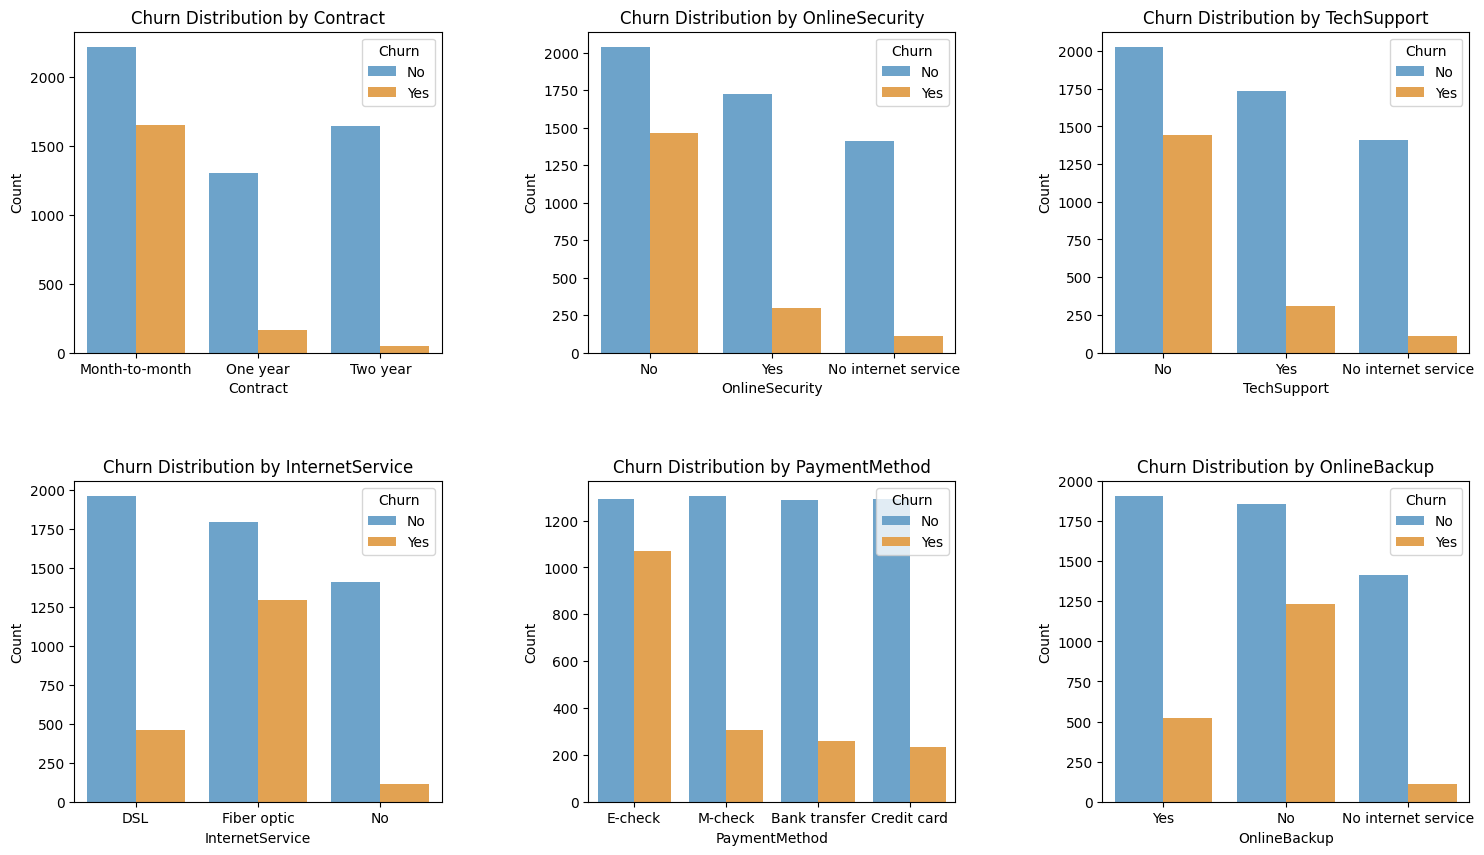

In [501]:
# Creating a copy of the DataFrame
churn_df_copy = churn_df_raw.copy()

# Replacing category values with abbreviations
churn_df_copy['PaymentMethod'] = churn_df_copy['PaymentMethod'].replace({
    'Electronic check': 'E-check',
    'Mailed check': 'M-check',
    'Bank transfer (automatic)': 'Bank transfer',
    'Credit card (automatic)': 'Credit card'
})

# Defining the colors 'orange' and 'blue'
colors = ['#5DA5DA', '#FAA43A']

# List of categories
categories = ['Contract', 'OnlineSecurity', 'TechSupport', 'InternetService', 'PaymentMethod', 'OnlineBackup']

# Creating the subplot grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Adjusting the layout
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Iterating over categories and plotting bar charts
for i, category in enumerate(categories):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.countplot(x=category, hue='Churn', data=churn_df_copy, ax=ax, palette=colors)
    ax.set_title(f'Churn Distribution by {category}')
    ax.set_xlabel(category)
    ax.set_ylabel('Count')
    ax.legend(title='Churn', labels=['No', 'Yes'])

# # Save the plot as an image file (e.g., PNG)
# plt.savefig('subplot_churn_distribution.png', bbox_inches='tight')

# Displaying the plots
plt.show()

In [502]:
# Setting the correlation threshold below which features will be removed
correlation_limit = 0.05  # You can adjust this value as needed

# Selecting columns with correlations lower than the defined limit
columns_to_remove = churn_correlation[abs(churn_correlation) < correlation_limit].index

# Removing selected columns from the balanced dataset
churn_df = churn_df.drop(columns=columns_to_remove)

# Printing the columns that were removed
print("Columns removed:")
print(columns_to_remove)

Columns removed:
Index(['MultipleLines_Yes', 'PhoneService', 'gender',
       'MultipleLines_No phone service', 'MultipleLines_No'],
      dtype='object')


In [503]:
# # Save churn_df to an csv file
# churn_df.to_csv('Churn clean data.csv', index=False)

# # Save churn_df to an excel file
# churn_df.to_excel('Churn clean data.xlsx', index=False)

### 2.6: Train Test Split

- Normal

In [504]:
from sklearn.model_selection import train_test_split

# Extracting features (X) and target (y) from the DataFrame
X = churn_df.drop(columns=['Churn'])
y = churn_df['Churn']

# Splitting the data into training and test sets with stratification
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # Splitting again to obtain the validation set

# Displaying the shapes of the resulting datasets
print("Shape of training set:", X_train.shape, y_train.shape)
print("Shape of validation set:", X_val.shape, y_val.shape)
print("Shape of test set:", X_test.shape, y_test.shape)

Shape of training set: (4218, 35) (4218,)
Shape of validation set: (1407, 35) (1407,)
Shape of test set: (1407, 35) (1407,)


In [505]:
# Counting the occurrences of each class in the training, validation, and test set
pd.Series(y_train).value_counts(), pd.Series(y_val).value_counts(), pd.Series(y_test).value_counts()

(Churn
 False    3087
 True     1131
 Name: count, dtype: int64,
 Churn
 False    1043
 True      364
 Name: count, dtype: int64,
 Churn
 False    1033
 True      374
 Name: count, dtype: int64)

- Undersampling

In [506]:
from imblearn.under_sampling import RandomUnderSampler

# Create the sampler for undersampling
undersampler = RandomUnderSampler(random_state=42)

# Apply undersampling only to the training set
X_train_us, y_train_us = undersampler.fit_resample(X_train, y_train)

print("Shape of training set after undersampling:", X_train_us.shape, y_train_us.shape)

Shape of training set after undersampling: (2262, 35) (2262,)


In [507]:
# Counting the occurrences of each class in the training, validation, and test set
pd.Series(y_train_us).value_counts()

Churn
False    1131
True     1131
Name: count, dtype: int64

- SMOTE

In [508]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only on the training set to address class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [509]:
# Counting the occurrences of each class in the training, validation, and test set
pd.Series(y_train_smote).value_counts()

Churn
False    3087
True     3087
Name: count, dtype: int64

# Chapter 3: Building Machine Learning Models

### 3.1: Logistic Regression

- Normal

In [510]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Instantiate logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Train the logistic regression model
logistic_model.fit(X_train, y_train)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, logistic_model.predict(X_val), target_names=['Not Churn', 'Churn']))

              precision    recall  f1-score   support

   Not Churn       0.85      0.89      0.87      1043
       Churn       0.65      0.55      0.60       364

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



- Undersampling

In [511]:
# Train the logistic regression model 
logistic_model.fit(X_train_us, y_train_us)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, logistic_model.predict(X_val), target_names=['Not Churn', 'Churn']))

              precision    recall  f1-score   support

   Not Churn       0.92      0.72      0.80      1043
       Churn       0.50      0.81      0.62       364

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.81      0.74      0.76      1407



- SMOTE

In [512]:
# Train the logistic regression model
logistic_model.fit(X_train_smote, y_train_smote)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, logistic_model.predict(X_val), target_names=['Not Churn', 'Churn']))

              precision    recall  f1-score   support

   Not Churn       0.92      0.72      0.81      1043
       Churn       0.51      0.82      0.62       364

    accuracy                           0.75      1407
   macro avg       0.71      0.77      0.72      1407
weighted avg       0.81      0.75      0.76      1407



### 3.2: Random Forest

- Normal

In [513]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate Random Forest classifier
rf = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=50,
    random_state=42
)

# Train the Random Forest classifier 
rf.fit(X_train, y_train)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, rf.predict(X_val), target_names=['Not Churn', 'Churn']))

              precision    recall  f1-score   support

   Not Churn       0.84      0.90      0.87      1043
       Churn       0.63      0.50      0.56       364

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.79      1407



- Undersampling

In [514]:
# Train the Random Forest classifier 
rf.fit(X_train_us, y_train_us)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, rf.predict(X_val), target_names=['Not Churn', 'Churn']))

              precision    recall  f1-score   support

   Not Churn       0.91      0.73      0.81      1043
       Churn       0.51      0.80      0.62       364

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.81      0.75      0.76      1407



In [515]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report

# # Define the hyperparameters you want to adjust, including the original hyperparameters
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'random_state': [42],
# }

# # Create a Random Forest classifier
# rf = RandomForestClassifier()

# # Create a GridSearchCV object
# grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)

# # Train the model using the imbalanced dataset
# grid_search.fit(X_train_us, y_train_us)

# # Print the best hyperparameters found
# print("Best hyperparameters:", grid_search.best_params_)

# # Generate the classification report for the original validation set
# print("Classification Report:")
# print(classification_report(y_val, grid_search.best_estimator_.predict(X_val), target_names=['Not Churn', 'Churn']))

- SMOTE

In [516]:
# Train the Random Forest classifier 
rf.fit(X_train_smote, y_train_smote)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, rf.predict(X_val), target_names=['Not Churn', 'Churn']))

              precision    recall  f1-score   support

   Not Churn       0.88      0.81      0.84      1043
       Churn       0.55      0.67      0.61       364

    accuracy                           0.77      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.79      0.77      0.78      1407



### 3.3: Gradient Boosting

- Normal

In [517]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate Gradient Boosting classifier with specified hyperparameters
gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, random_state=42)

# Train the Gradient Boosting classifier 
gbc.fit(X_train, y_train)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, gbc.predict(X_val), target_names=['Not Churn', 'Churn']))

              precision    recall  f1-score   support

   Not Churn       0.85      0.91      0.88      1043
       Churn       0.67      0.53      0.59       364

    accuracy                           0.81      1407
   macro avg       0.76      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



- Undersampling

In [518]:
# Train the Gradient Boosting classifier
gbc.fit(X_train_us, y_train_us)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, gbc.predict(X_val), target_names=['Not Churn', 'Churn']))

              precision    recall  f1-score   support

   Not Churn       0.93      0.72      0.81      1043
       Churn       0.51      0.84      0.63       364

    accuracy                           0.75      1407
   macro avg       0.72      0.78      0.72      1407
weighted avg       0.82      0.75      0.76      1407



In [519]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import classification_report

# # Define the hyperparameters you want to adjust
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.05, 0.1, 0.2],
#     # Add other hyperparameters you want to adjust here
# }

# # Create a Gradient Boosting classifier
# gbc = GradientBoostingClassifier(random_state=42)

# # Create a GridSearchCV object
# grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='f1', n_jobs=-1)

# # Train the model using the imbalanced dataset
# grid_search.fit(X_train_us, y_train_us)

# # Print the best hyperparameters found
# print("Best hyperparameters:", grid_search.best_params_)

# # Generate the classification report for the original validation set
# print("Classification Report:")
# print(classification_report(y_val, grid_search.best_estimator_.predict(X_val), target_names=['Not Churn', 'Churn']))

- SMOTE

In [520]:
# Train the Gradient Boosting classifier 
gbc.fit(X_train_smote, y_train_smote)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, gbc.predict(X_val), target_names=['Not Churn', 'Churn']))

              precision    recall  f1-score   support

   Not Churn       0.90      0.78      0.83      1043
       Churn       0.54      0.76      0.63       364

    accuracy                           0.77      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.81      0.77      0.78      1407



### 3.4: SVC

In [521]:
from sklearn.svm import LinearSVC

# Instantiate Support Vector Classifier 
svc = LinearSVC(class_weight='balanced', random_state=42)

# Train the Support Vector Classifier
svc.fit(X_train, y_train)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, svc.predict(X_val), target_names=['Not Churn', 'Churn']))

C:\Users\yamas\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

   Not Churn       0.92      0.71      0.80      1043
       Churn       0.50      0.82      0.62       364

    accuracy                           0.74      1407
   macro avg       0.71      0.77      0.71      1407
weighted avg       0.81      0.74      0.76      1407



The Support Vector Classifier (SVC) model was constructed without undersampling or SMOTE techniques as they were considered unnecessary for this particular dataset. The inherent characteristics of the data, in conjunction with the algorithm's robustness, made such balancing methods unnecessary. Therefore, the SVC model was trained using the original imbalanced dataset, achieving satisfactory performance without the need for additional sampling strategies.

### 3.5: Sequential Neural Network

In [522]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Building the neural network
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),  # Dropout for regularization
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compiling the model
model_nn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model
history = model_nn.fit(X_train_us, y_train_us, epochs=50, batch_size=64, validation_data=(X_val, y_val), verbose=0)

# Evaluating the model
evaluation = model_nn.evaluate(X_val, y_val)
print("Loss:", evaluation[0])
print("Accuracy:", evaluation[1])

C:\Users\yamas\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.7388 - loss: 0.5245
Loss: 0.5141503810882568
Accuracy: 0.7491115927696228


In [523]:
# Model predictions for the validation set
y_pred_prob = model_nn.predict(X_val)

# Thresholding probabilities to obtain predicted classes
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate the classification report
print(classification_report(y_val, y_pred, target_names=['Not Churn', 'Churn']))

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

   Not Churn       0.91      0.73      0.81      1043
       Churn       0.51      0.80      0.62       364

    accuracy                           0.75      1407
   macro avg       0.71      0.77      0.72      1407
weighted avg       0.81      0.75      0.76      1407



# Chapter 4: Testing Model and Conclusion

In [524]:
import pickle

# Train the Gradient Boosting classifier
gbc.fit(X_train_us, y_train_us)

# # Save the trained model to a file
# with open('gradient_boosting_model.pkl', 'wb') as file:
#     pickle.dump(gbc, file)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_test, gbc.predict(X_test), target_names=['Not Churn', 'Churn']))

              precision    recall  f1-score   support

   Not Churn       0.92      0.70      0.80      1033
       Churn       0.50      0.82      0.62       374

    accuracy                           0.73      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.81      0.73      0.75      1407



Based on the classification report, the model achieved a relatively high recall of 82% for the 'Churn' class, indicating that it correctly identified 82% of the churn instances. However, the precision for the 'Churn' class was 50%, signifying that only half of the predicted churn instances were actually true churn cases. Consequently, users may receive approximately two notifications, one of which is accurate while the other is a false positive.